In [ ]:
import pandas as pd
import numpy as np

# Loading the datasets
student_performance = pd.read_csv('/content/Student_performance_data _ 2.csv')
factors_affecting_grades = pd.read_csv('/content/Factors_ affecting_ university_student_grades_dataset 2.csv')

def clean_dataset(df):
    # Handling missing values
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].median(), inplace=True)

    # Removing duplicates
    df.drop_duplicates(inplace=True)

    return df

# Cleaning both datasets
student_performance_clean = clean_dataset(student_performance)
factors_affecting_grades_clean = clean_dataset(factors_affecting_grades)

# Printing info about the cleaned datasets
print("Student Performance Dataset:")
print(student_performance_clean.info())
print("\nFactors Affecting Grades Dataset:")
print(factors_affecting_grades_clean.info())

# Saving cleaned datasets
student_performance_clean.to_csv('student_performance_clean.csv', index=False)
factors_affecting_grades_clean.to_csv('factors_affecting_grades_clean.csv', index=False)

Student Performance Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Loading the cleaned datasets
student_performance = pd.read_csv('student_performance_clean.csv')
factors_affecting_grades = pd.read_csv('factors_affecting_grades_clean.csv')

# Identifying numeric and categorical columns
sp_numeric = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
sp_categorical = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
                  'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']

fag_numeric = ['Age', 'Attendance', 'Study_Hours', 'Class_Size', 'Sleep_Patterns',
               'Screen_Time', 'Time_Wasted_on_Social_Media']
fag_categorical = ['Gender', 'Parental_Education', 'Family_Income', 'Previous_Grades',
                   'Class_Participation', 'Major', 'School_Type', 'Financial_Status',
                   'Parental_Involvement', 'Educational_Resources', 'Motivation', 'Self_Esteem',
                   'Stress_Levels', 'School_Environment', 'Professor_Quality',
                   'Extracurricular_Activities', 'Nutrition', 'Physical_Activity',
                   'Educational_Tech_Use', 'Peer_Group', 'Bullying', 'Study_Space',
                   'Learning_Style', 'Tutoring', 'Mentoring', 'Lack_of_Interest',
                   'Sports_Participation', 'Grades']

def preprocess_data(df, numeric_features, categorical_features):

    df = df.copy()

    for col in categorical_features:
        df[col] = df[col].astype('category')

    # Numeric preprocessing
    numeric_transformer = SimpleImputer(strategy='median')
    numeric_data = df[numeric_features]
    numeric_imputed = pd.DataFrame(numeric_transformer.fit_transform(numeric_data),
                                   columns=numeric_features,
                                   index=df.index)

    # Categorical preprocessing
    categorical_data = df[categorical_features]

    # Handle categorical imputation manually to avoid type conflicts
    for col in categorical_features:
        categorical_data.loc[:, col] = categorical_data[col].fillna(categorical_data[col].mode()[0])

    # One-hot encoding
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    categorical_encoded = pd.DataFrame(encoder.fit_transform(categorical_data),
                                       columns=encoder.get_feature_names_out(categorical_features),
                                       index=df.index)

    # Combining preprocessed data
    preprocessed_df = pd.concat([numeric_imputed, categorical_encoded], axis=1)

    # Scaling numeric features
    scaler = StandardScaler()
    preprocessed_df[numeric_features] = scaler.fit_transform(preprocessed_df[numeric_features])

    return preprocessed_df

# Preprocessing both datasets
sp_preprocessed_df = preprocess_data(student_performance, sp_numeric, sp_categorical)
fag_preprocessed_df = preprocess_data(factors_affecting_grades, fag_numeric, fag_categorical)

# Feature Engineering
sp_preprocessed_df['StudyEfficiency'] = sp_preprocessed_df['StudyTimeWeekly'] / (sp_preprocessed_df['Absences'] + 1)
fag_preprocessed_df['StudyEfficiency'] = fag_preprocessed_df['Study_Hours'] / (100 - fag_preprocessed_df['Attendance'] + 1)

# Saving preprocessed datasets
sp_preprocessed_df.to_csv('student_performance_preprocessed.csv', index=False)
fag_preprocessed_df.to_csv('factors_affecting_grades_preprocessed.csv', index=False)

print("Preprocessing complete. Datasets saved as CSV files.")
print("Student Performance shape:", sp_preprocessed_df.shape)
print("Factors Affecting Grades shape:", fag_preprocessed_df.shape)

# Displaying first few rows and data info
print("\nStudent Performance - First few rows:")
print(sp_preprocessed_df.head())
print("\nStudent Performance - Data Info:")
print(sp_preprocessed_df.info())

print("\nFactors Affecting Grades - First few rows:")
print(fag_preprocessed_df.head())
print("\nFactors Affecting Grades - Data Info:")
print(fag_preprocessed_df.info())

Preprocessing complete. Datasets saved as CSV files.
Student Performance shape: (2392, 36)
Factors Affecting Grades shape: (10064, 90)

Student Performance - First few rows:
        Age  StudyTimeWeekly  Absences       GPA  Gender_0  Gender_1  \
0  0.472919         1.780336 -0.890822  1.118086       0.0       1.0   
1  1.362944         0.997376 -1.717694  1.242374       1.0       0.0   
2 -1.307132        -0.984045  1.353542 -1.960277       1.0       0.0   
3  0.472919         0.045445 -0.063951  0.161790       0.0       1.0   
4  0.472919        -0.902311  0.290422 -0.675573       0.0       1.0   

   Ethnicity_0  Ethnicity_1  Ethnicity_2  Ethnicity_3  ...  Music_0  Music_1  \
0          1.0          0.0          0.0          0.0  ...      0.0      1.0   
1          1.0          0.0          0.0          0.0  ...      1.0      0.0   
2          0.0          0.0          1.0          0.0  ...      1.0      0.0   
3          1.0          0.0          0.0          0.0  ...      1.0      

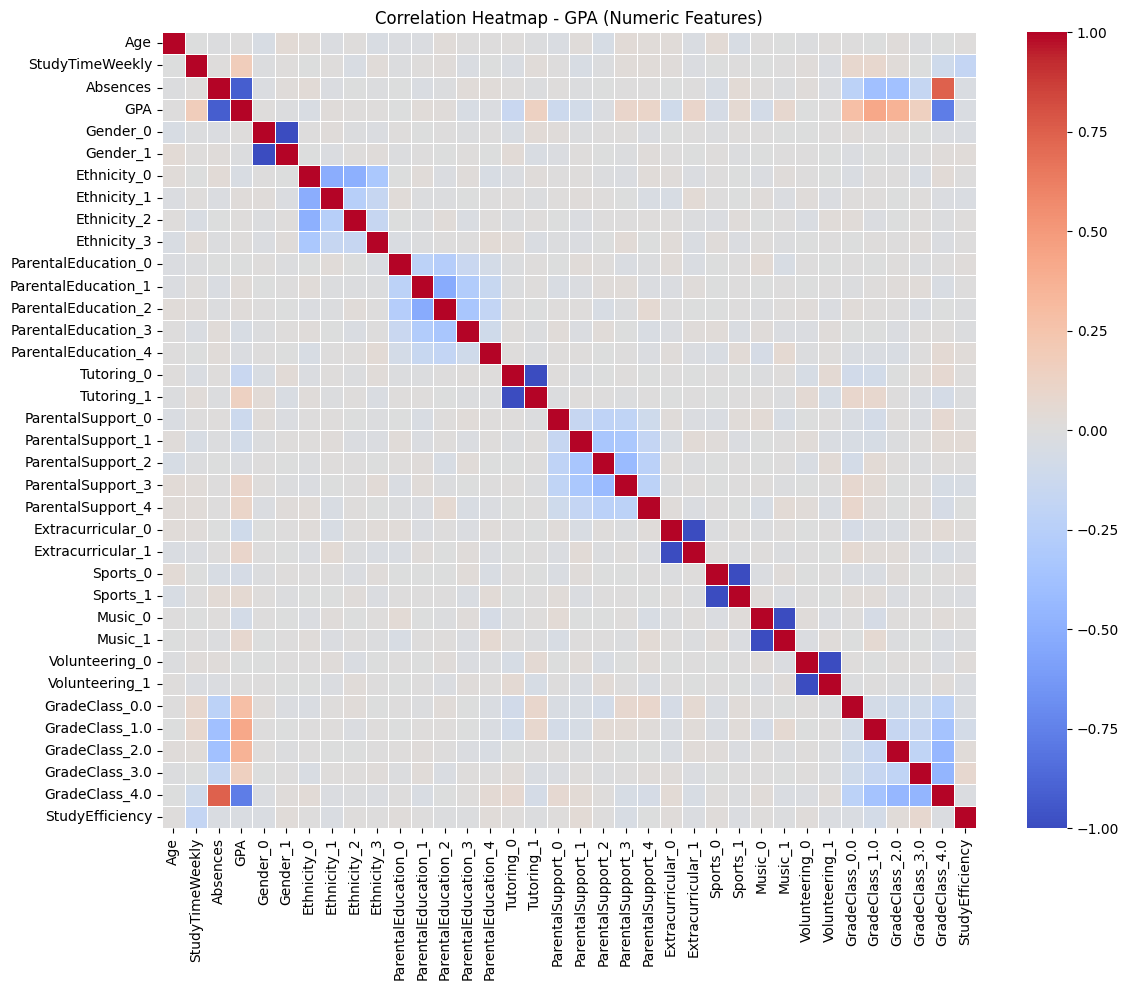

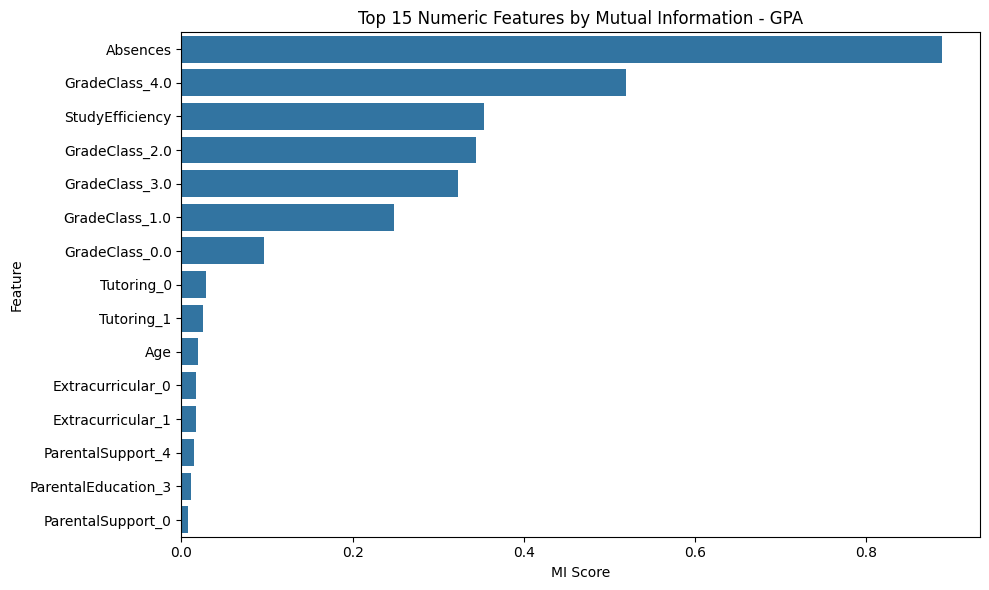

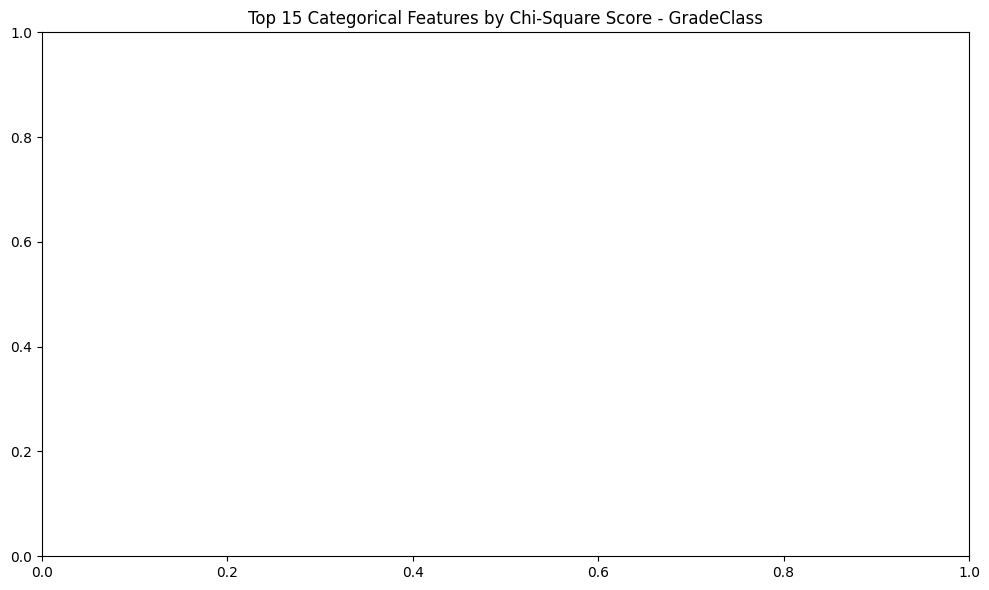

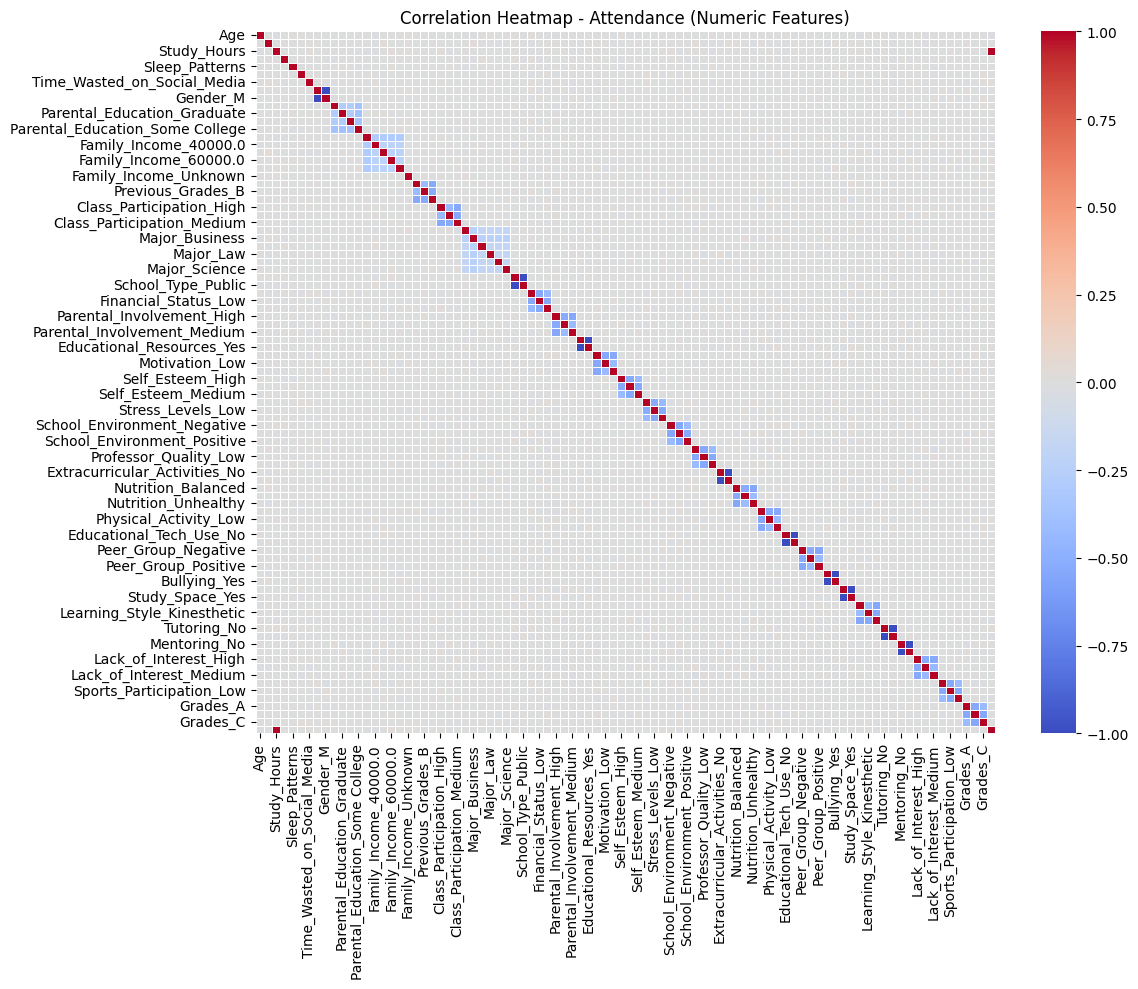

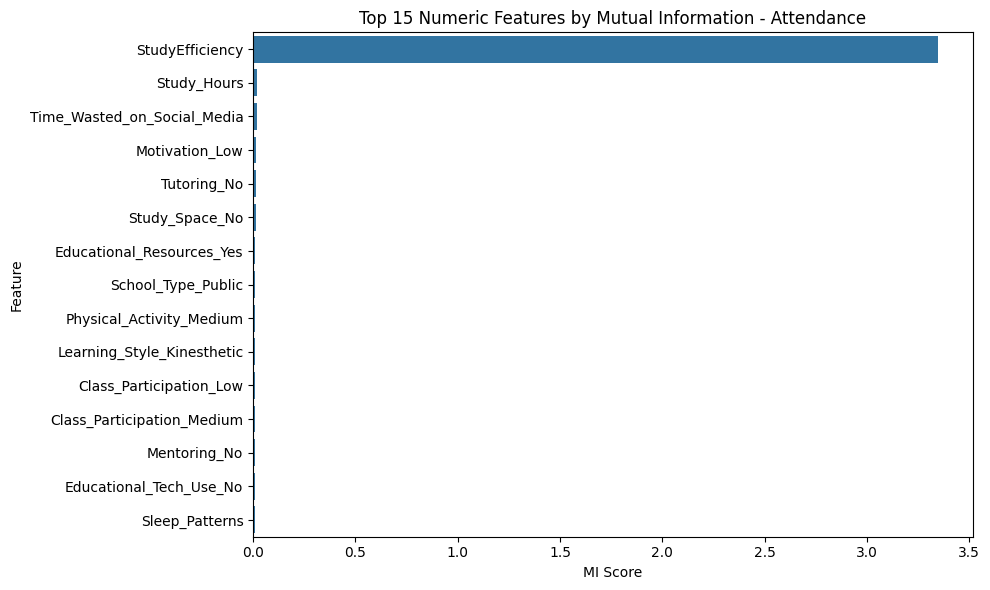

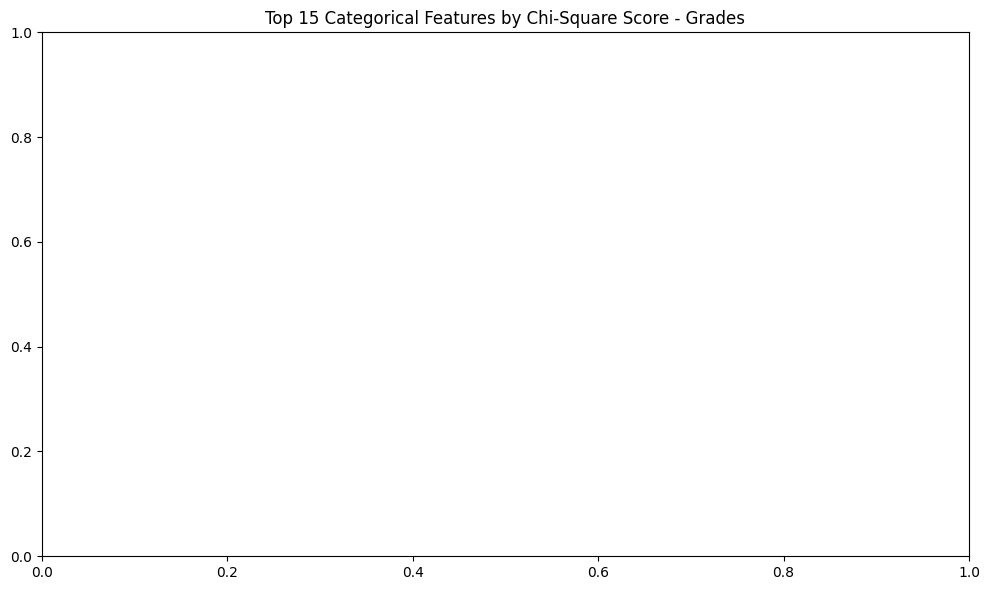

Feature analysis and engineering complete. Updated datasets saved.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from scipy.stats import chi2_contingency

# Loading preprocessed datasets
sp_df = pd.read_csv('/content/student_performance_preprocessed.csv')
fag_df = pd.read_csv('/content/factors_affecting_grades_preprocessed.csv')

def analyze_numeric_features(df, target_column):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    numeric_df = df[numeric_columns]

    # Correlation analysis
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
    plt.title(f'Correlation Heatmap - {target_column} (Numeric Features)')
    plt.tight_layout()
    plt.show()

    # Mutual Information
    mi_scores = mutual_info_regression(numeric_df.drop(columns=[target_column]), numeric_df[target_column])
    mi_df = pd.DataFrame({'Feature': numeric_df.drop(columns=[target_column]).columns, 'MI Score': mi_scores})
    mi_df = mi_df.sort_values('MI Score', ascending=False).head(15)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='MI Score', y='Feature', data=mi_df)
    plt.title(f'Top 15 Numeric Features by Mutual Information - {target_column}')
    plt.tight_layout()
    plt.show()

def analyze_categorical_features(df, target_column):
    categorical_columns = df.select_dtypes(include=['object']).columns
    chi2_scores = {}

    for column in categorical_columns:
        if column != target_column:
            contingency_table = pd.crosstab(df[column], df[target_column])
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            chi2_scores[column] = chi2

    chi2_df = pd.DataFrame({'Feature': chi2_scores.keys(), 'Chi-Square Score': chi2_scores.values()})
    chi2_df = chi2_df.sort_values('Chi-Square Score', ascending=False).head(15)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Chi-Square Score', y='Feature', data=chi2_df)
    plt.title(f'Top 15 Categorical Features by Chi-Square Score - {target_column}')
    plt.tight_layout()
    plt.show()

# Analyzing Student Performance dataset
analyze_numeric_features(sp_df, 'GPA')
analyze_categorical_features(sp_df, 'GradeClass')

# Analyzing Factors Affecting Grades dataset
analyze_numeric_features(fag_df, 'Attendance')
analyze_categorical_features(fag_df, 'Grades')

# Additional Feature Engineering
sp_df['TotalExtracurricular'] = sp_df['Sports_1'] + sp_df['Music_1'] + sp_df['Volunteering_1']
sp_df['ParentalInfluence'] = sp_df['ParentalEducation_4'] * sp_df['ParentalSupport_4']

fag_df['AcademicEngagement'] = fag_df['Class_Participation_High'] + fag_df['Motivation_High'] + fag_df['Educational_Tech_Use_Yes']
fag_df['LifestyleBalance'] = fag_df['Sleep_Patterns'] - fag_df['Screen_Time'] + fag_df['Physical_Activity_High']

# Saving updated datasets
sp_df.to_csv('student_performance_engineered.csv', index=False)
fag_df.to_csv('factors_affecting_grades_engineered.csv', index=False)

print("Feature analysis and engineering complete. Updated datasets saved.")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the preprocessed datasets
sp_df = pd.read_csv('/content/student_performance_preprocessed.csv')
fag_df = pd.read_csv('/content/factors_affecting_grades_preprocessed.csv')

# Select important features
sp_features = ['Absences', 'StudyEfficiency', 'Tutoring_0', 'Tutoring_1', 'Age',
               'Extracurricular_0', 'Extracurricular_1'] + [col for col in sp_df.columns if 'GradeClass' in col]

fag_features = ['StudyEfficiency', 'Study_Hours', 'Time_Wasted_on_Social_Media',
                'Motivation_Low', 'Tutoring_No', 'Study_Space_No', 'Attendance']

# Create final datasets with selected features
sp_final = sp_df[sp_features + ['GPA']].copy()
fag_final = fag_df[fag_features + ['Grades_A', 'Grades_B', 'Grades_C']].copy()

# Additional feature engineering
sp_final.loc[:, 'TimeManagement'] = sp_final['StudyEfficiency'] / (sp_final['Absences'] + 1)
fag_final.loc[:, 'TimeManagement'] = fag_final['Study_Hours'] / (fag_final['Time_Wasted_on_Social_Media'] + 1)

# Normalize numerical features
scaler = StandardScaler()
sp_numeric_features = ['Absences', 'StudyEfficiency', 'Age', 'TimeManagement']
fag_numeric_features = ['StudyEfficiency', 'Study_Hours', 'Time_Wasted_on_Social_Media', 'Attendance', 'TimeManagement']

sp_final.loc[:, sp_numeric_features] = scaler.fit_transform(sp_final[sp_numeric_features])
fag_final.loc[:, fag_numeric_features] = scaler.fit_transform(fag_final[fag_numeric_features])

# Save final datasets
sp_final.to_csv('student_performance_final.csv', index=False)
fag_final.to_csv('factors_affecting_grades_final.csv', index=False)

print("Final datasets created and saved.")
print("Student Performance shape:", sp_final.shape)
print("Factors Affecting Grades shape:", fag_final.shape)

# Display first few rows and data info for both datasets
print("\nStudent Performance - First few rows:")
print(sp_final.head())
print("\nStudent Performance - Data Info:")
print(sp_final.info())

print("\nFactors Affecting Grades - First few rows:")
print(fag_final.head())
print("\nFactors Affecting Grades - Data Info:")
print(fag_final.info())

Final datasets created and saved.
Student Performance shape: (2392, 14)
Factors Affecting Grades shape: (10064, 11)

Student Performance - First few rows:
   Absences  StudyEfficiency  Tutoring_0  Tutoring_1       Age  \
0 -0.890822         0.700395         0.0         1.0  0.472919   
1 -1.717694        -0.087231         1.0         0.0  1.362944   
2  1.353542        -0.043988         1.0         0.0 -1.307132   
3 -0.063951        -0.023218         1.0         0.0  0.472919   
4  0.290422        -0.056500         0.0         1.0  0.472919   

   Extracurricular_0  Extracurricular_1  GradeClass_0.0  GradeClass_1.0  \
0                1.0                0.0             0.0             0.0   
1                1.0                0.0             0.0             1.0   
2                1.0                0.0             0.0             0.0   
3                0.0                1.0             0.0             0.0   
4                1.0                0.0             0.0             0.0  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the final datasets
sp_df = pd.read_csv('student_performance_final.csv')
fag_df = pd.read_csv('factors_affecting_grades_final.csv')

def train_evaluate_rf_regressor(X, y, model_name):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name} - Random Forest Regressor Results:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")

    # Feature importance
    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.bar(feature_importance['feature'], feature_importance['importance'])
    plt.title(f"{model_name} - Feature Importance")
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f'{model_name}_feature_importance.png')
    plt.close()

def train_evaluate_rf_classifier(X, y, model_name):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n{model_name} - Random Forest Classifier Results:")
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Feature importance
    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.bar(feature_importance['feature'], feature_importance['importance'])
    plt.title(f"{model_name} - Feature Importance")
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f'{model_name}_feature_importance.png')
    plt.close()

# Student Performance - Regression model for GPA prediction
X_sp = sp_df.drop('GPA', axis=1)
y_sp = sp_df['GPA']
train_evaluate_rf_regressor(X_sp, y_sp, "Student_Performance")

# Factors Affecting Grades - Multi-class classification for grade prediction
X_fag = fag_df.drop(['Grades_A', 'Grades_B', 'Grades_C'], axis=1)
y_fag = fag_df['Grades_A'] * 2 + fag_df['Grades_B']  # Creating a multi-class target (0: C, 1: B, 2: A)
train_evaluate_rf_classifier(X_fag, y_fag, "Factors_Affecting_Grades")

print("Feature importance graphs have been saved as PNG files.")


Student_Performance - Random Forest Regressor Results:
Mean Squared Error: 0.08977902145228761
R-squared Score: 0.9091105992969623

Factors_Affecting_Grades - Random Forest Classifier Results:
Accuracy: 0.33482364629905614

Classification Report:
              precision    recall  f1-score   support

         0.0       0.31      0.25      0.27       642
         1.0       0.39      0.46      0.42       788
         2.0       0.27      0.26      0.27       583

    accuracy                           0.33      2013
   macro avg       0.32      0.32      0.32      2013
weighted avg       0.33      0.33      0.33      2013

Feature importance graphs have been saved as PNG files.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
sp_df = pd.read_csv('student_performance_final.csv')

# Prepare the data
X = sp_df.drop('GPA', axis=1)
y = sp_df['GPA']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Function to identify at-risk students
def identify_at_risk_students(model, student_data, gpa_threshold=2.5):
    predicted_gpa = model.predict(student_data)
    at_risk = student_data[predicted_gpa < gpa_threshold]
    return at_risk

# Identify at-risk students in the test set
at_risk_students = identify_at_risk_students(rf_model, X_test)

print(f"\nNumber of at-risk students identified: {len(at_risk_students)}")
print("\nTop factors contributing to at-risk status:")
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
print(feature_importance.sort_values('importance', ascending=False).head())

# Develop intervention strategies
def suggest_interventions(at_risk_students):
    interventions = []
    if 'Absences' in at_risk_students.columns and at_risk_students['Absences'].mean() > 0:
        interventions.append("Implement an attendance improvement program")
    if 'TimeManagement' in at_risk_students.columns and at_risk_students['TimeManagement'].mean() < 0:
        interventions.append("Offer time management workshops")
    if 'StudyEfficiency' in at_risk_students.columns and at_risk_students['StudyEfficiency'].mean() < 0:
        interventions.append("Provide study skills training")
    return interventions

suggested_interventions = suggest_interventions(at_risk_students)
print("\nSuggested interventions based on at-risk student data:")
for intervention in suggested_interventions:
    print(f"- {intervention}")

Mean Squared Error: 0.08977902145228761
R-squared Score: 0.9091105992969623

Number of at-risk students identified: 479

Top factors contributing to at-risk status:
            feature  importance
0          Absences    0.827352
12   TimeManagement    0.039441
11   GradeClass_4.0    0.030062
1   StudyEfficiency    0.026019
10   GradeClass_3.0    0.020250

Suggested interventions based on at-risk student data:


In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.0 MB/s eta 0:00:00


Cross-validation R-squared scores: [0.93423932 0.91969929 0.92603466 0.93570646 0.09819711]
Mean R-squared score: 0.7627753686226997


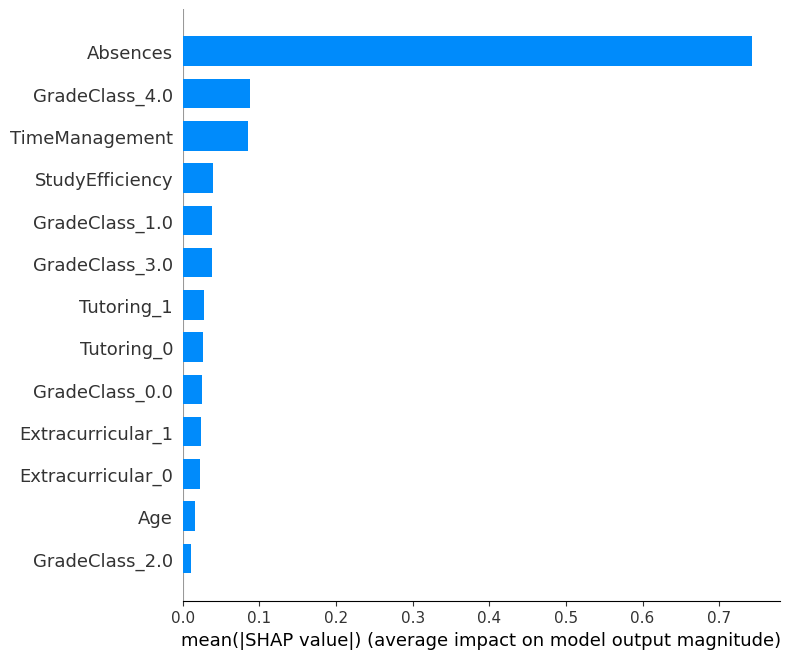


Number of at-risk students identified: 2392


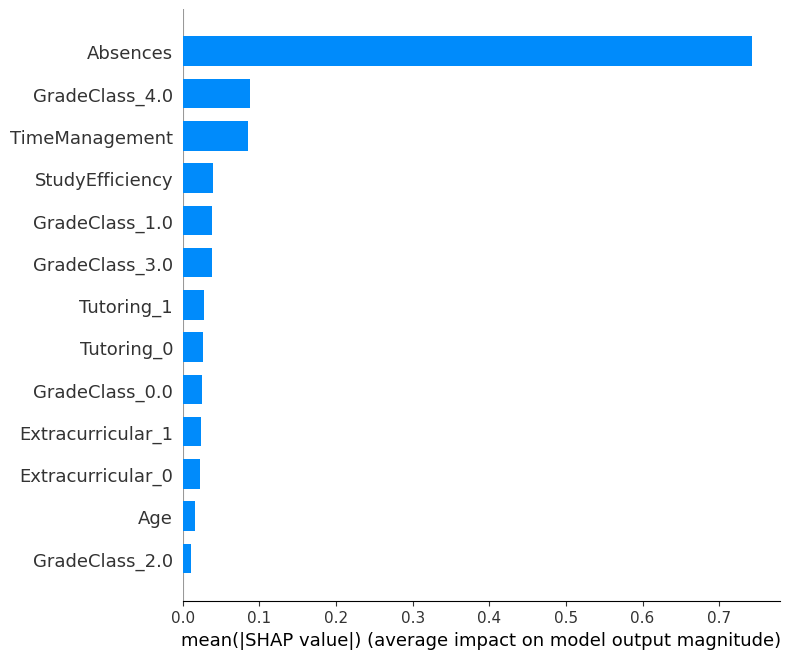


Suggested interventions based on at-risk student data:
- Implement an attendance improvement program
- Offer time management workshops


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap

# Load the data
sp_df = pd.read_csv('student_performance_final.csv')

# Prepare the data
X = sp_df.drop('GPA', axis=1)
y = sp_df['GPA']

# Perform cross-validation
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Mean R-squared score: {np.mean(cv_scores)}")

# Train the model on the full dataset
rf_model.fit(X, y)

# SHAP values for explainability
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)

# Plot SHAP summary
shap.summary_plot(shap_values, X, plot_type="bar")

# Function to identify at-risk students (same as before)
def identify_at_risk_students(model, student_data, gpa_threshold=2.5):
    predicted_gpa = model.predict(student_data)
    at_risk = student_data[predicted_gpa < gpa_threshold]
    return at_risk

# Identify at-risk students
at_risk_students = identify_at_risk_students(rf_model, X)

print(f"\nNumber of at-risk students identified: {len(at_risk_students)}")

# SHAP values for at-risk students
at_risk_shap_values = explainer.shap_values(at_risk_students)
shap.summary_plot(at_risk_shap_values, at_risk_students, plot_type="bar")

# Develop intervention strategies (same as before)
def suggest_interventions(at_risk_students):
    interventions = []
    if 'Absences' in at_risk_students.columns and at_risk_students['Absences'].mean() > 0:
        interventions.append("Implement an attendance improvement program")
    if 'TimeManagement' in at_risk_students.columns and at_risk_students['TimeManagement'].mean() < 0:
        interventions.append("Offer time management workshops")
    if 'StudyEfficiency' in at_risk_students.columns and at_risk_students['StudyEfficiency'].mean() < 0:
        interventions.append("Provide study skills training")
    return interventions

suggested_interventions = suggest_interventions(at_risk_students)
print("\nSuggested interventions based on at-risk student data:")
for intervention in suggested_interventions:
    print(f"- {intervention}")

Improved Model Results:
Accuracy: 0.37257824143070045

Classification Report:
              precision    recall  f1-score   support

         0.0       0.34      0.27      0.30       642
         1.0       0.42      0.52      0.46       788
         2.0       0.32      0.29      0.31       583

    accuracy                           0.37      2013
   macro avg       0.36      0.36      0.36      2013
weighted avg       0.37      0.37      0.36      2013


Top 10 Important Features:
                            feature  importance
1                       Study_Hours    0.181453
2       Time_Wasted_on_Social_Media    0.120579
7                    TimeManagement    0.109829
6                        Attendance    0.108230
8  StudyEfficiency_x_TimeManagement    0.100809
3                    Motivation_Low    0.097040
0                   StudyEfficiency    0.096523
5                    Study_Space_No    0.093502
4                       Tutoring_No    0.092034
9          StudyHours_x_SocialMed

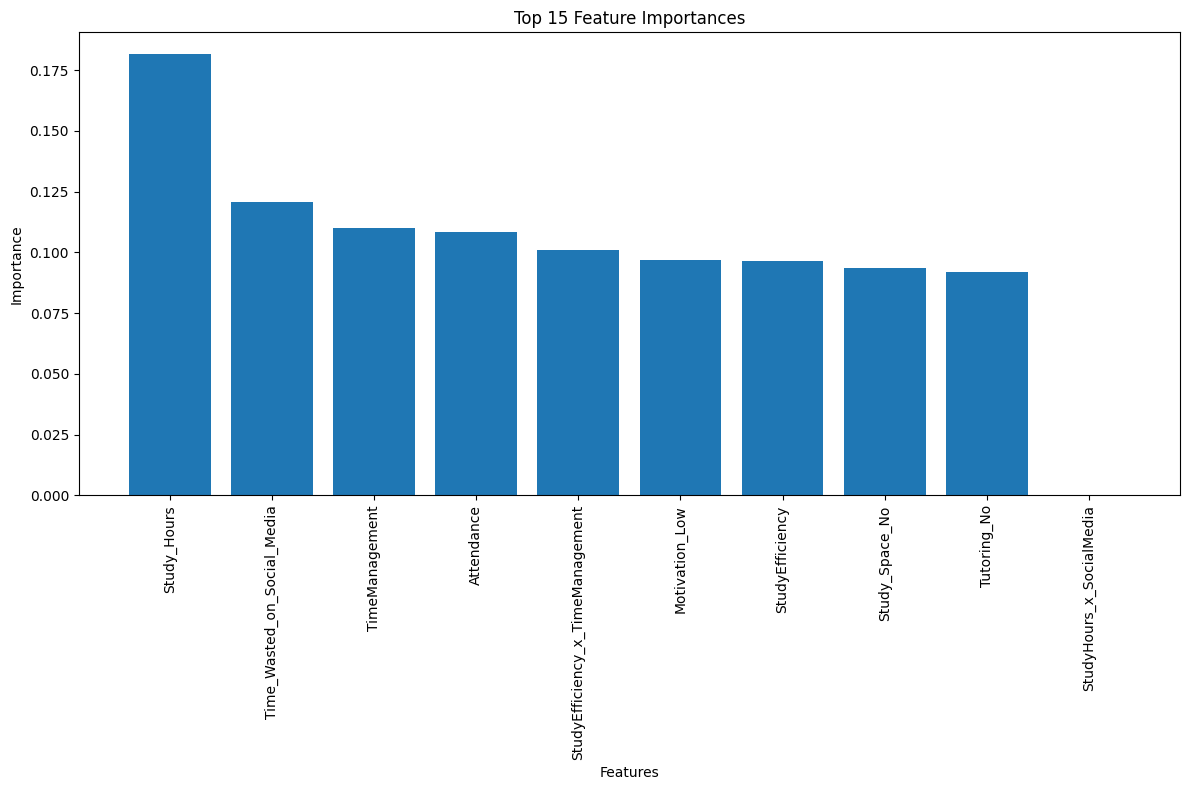

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Load the data
fag_df = pd.read_csv('factors_affecting_grades_final.csv')

# Prepare the data
X = fag_df.drop(['Grades_A', 'Grades_B', 'Grades_C'], axis=1)
y = fag_df['Grades_A'] * 2 + fag_df['Grades_B']  # 0: C, 1: B, 2: A

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature engineering
def engineer_features(X):
    X = X.copy()
    X['StudyEfficiency_x_TimeManagement'] = X['StudyEfficiency'] * X['TimeManagement']
    X['StudyHours_x_SocialMedia'] = X['Study_Hours'] / (X['Time_Wasted_on_Social_Media'] + 1)
    return X

X_train = engineer_features(X_train)
X_test = engineer_features(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Define hyperparameters for grid search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2]
}

# Perform grid search
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions
y_pred = best_xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Improved Model Results:")
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': best_xgb_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Important Features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.title('Top 15 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Suggestions for further improvement
print("\nSuggestions for further improvement:")
print("1. Collect more data if possible, especially for underrepresented classes.")
print("2. Experiment with other advanced algorithms like LightGBM or CatBoost.")
print("3. Try ensemble methods combining multiple models.")
print("4. Incorporate more domain-specific features if available.")
print("5. Consider using deep learning models if computational resources allow.")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2602
[LightGBM] [Info] Number of data points in the train set: 9870, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Ensemble Model Results:
Accuracy: 0.3626428216592151

Classification Report:
              precision    recall  f1-score   support

         0.0       0.33      0.28      0.30       642
         1.0       0.41      0.49      0.45       788
         2.0       0.31      0.28      0.29       583

    accuracy                           0.36      2013
   macro avg       0.35      0.35      0.35      2013
weighted avg       0.36      0.36      0.36      2013


Top 15 Important Features:
                             feature  importance
11             

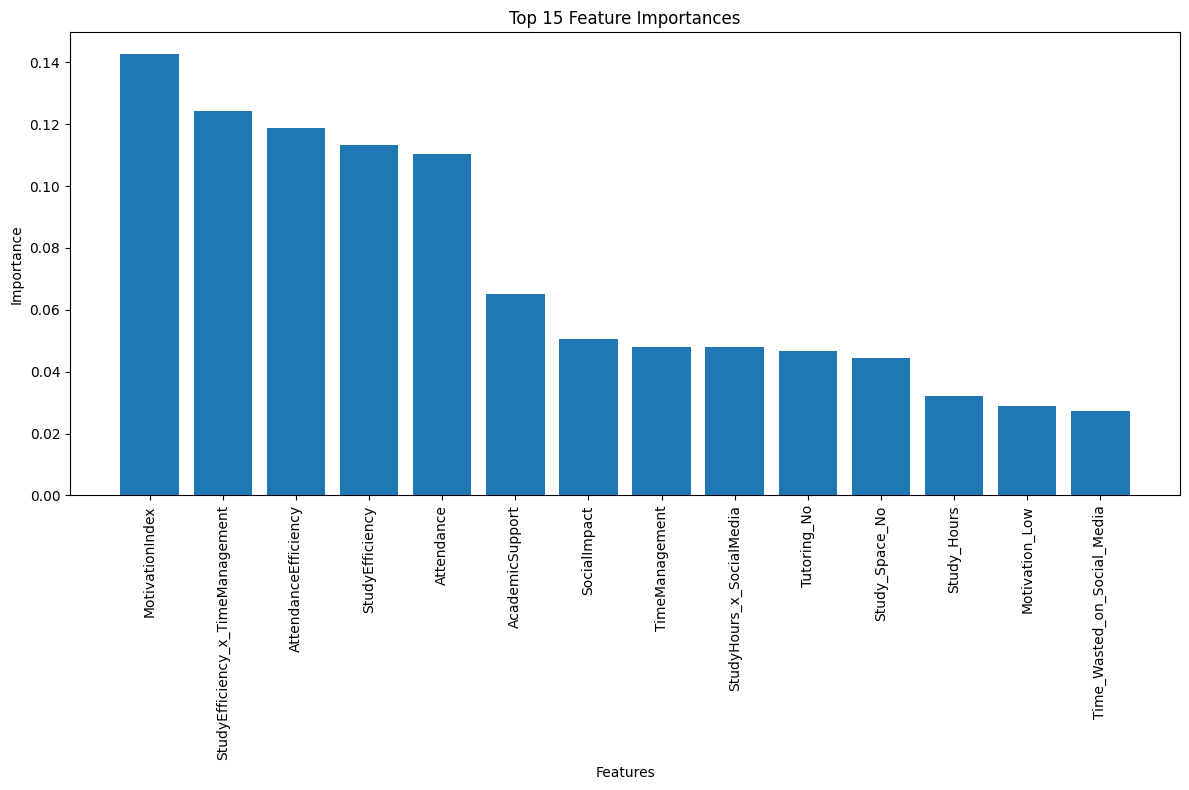

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# Load the data
fag_df = pd.read_csv('factors_affecting_grades_final.csv')

# Prepare the data
X = fag_df.drop(['Grades_A', 'Grades_B', 'Grades_C'], axis=1)
y = fag_df['Grades_A'] * 2 + fag_df['Grades_B']  # 0: C, 1: B, 2: A

# Feature engineering
def engineer_features(X):
    X = X.copy()
    # Existing engineered features
    X['StudyEfficiency_x_TimeManagement'] = X['StudyEfficiency'] * X['TimeManagement']
    X['StudyHours_x_SocialMedia'] = X['Study_Hours'] / (X['Time_Wasted_on_Social_Media'] + 1)

    # New engineered features
    X['AttendanceEfficiency'] = X['Attendance'] * X['StudyEfficiency']
    X['MotivationIndex'] = X['Motivation_Low'] * -1 + X['Study_Hours'] + X['Attendance']
    X['SocialImpact'] = X['Time_Wasted_on_Social_Media'] / (X['Study_Hours'] + 1)
    X['AcademicSupport'] = X['Tutoring_No'] * -1 + X['Study_Space_No'] * -1

    return X

X = engineer_features(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Create base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
lgb_model = LGBMClassifier(n_estimators=100, random_state=42)

# Create the ensemble model
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    voting='soft'
)

# Train the ensemble model
ensemble_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = ensemble_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Results:")
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': ensemble_model.estimators_[0].feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 15 Important Features:")
print(feature_importance.head(15))

# Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.title('Top 15 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the datasets
student_mat = pd.read_csv('student-mat.csv')
student_por = pd.read_csv('student-por.csv')

# Function to preprocess the data
def preprocess_student_data(df):
    # Convert categorical variables to numeric
    le = LabelEncoder()
    categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # Create a composite grade feature
    df['average_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

    # Create a study efficiency feature
    df['study_efficiency'] = df['studytime'] / (df['failures'] + 1)

    # Create a parental education feature
    df['parental_education'] = (df['Medu'] + df['Fedu']) / 2

    # Create an alcohol consumption feature
    df['alcohol_consumption'] = (df['Dalc'] + df['Walc']) / 2

    return df

# Preprocess both datasets
student_mat_processed = preprocess_student_data(student_mat)
student_por_processed = preprocess_student_data(student_por)

# Merge the datasets
merged_data = pd.concat([student_mat_processed, student_por_processed], axis=0, ignore_index=True)

# Remove duplicate rows (students who appear in both datasets)
merged_data = merged_data.drop_duplicates(subset=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu'])

print("Shape of merged dataset:", merged_data.shape)
print("\nFeatures in the merged dataset:")
print(merged_data.columns.tolist())

# Save the merged dataset
merged_data.to_csv('merged_student_data.csv', index=False)
print("\nMerged dataset saved as 'merged_student_data.csv'")

# Display summary statistics
print("\nSummary statistics of the merged dataset:")
print(merged_data.describe())

# Display correlation with average grade
correlation_with_grade = merged_data.corr()['average_grade'].sort_values(ascending=False)
print("\nTop 10 features correlated with average grade:")
print(correlation_with_grade.head(10))

Shape of merged dataset: (439, 37)

Features in the merged dataset:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'average_grade', 'study_efficiency', 'parental_education', 'alcohol_consumption']

Merged dataset saved as 'merged_student_data.csv'

Summary statistics of the merged dataset:
           school         sex         age     address     famsize     Pstatus  \
count  439.000000  439.000000  439.000000  439.000000  439.000000  439.000000   
mean     0.382688    0.439636   16.906606    0.653759    0.371298    0.820046   
std      0.486598    0.496909    1.328620    0.476314    0.483703    0.384588   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.

Original dataframe shape: (439, 37)

Columns with NaN values:
Series([], dtype: int64)

Dataframe shape after dropping NaN rows: (439, 37)

Target variable distribution:
G3
1    0.467153
0    0.437956
2    0.094891
Name: proportion, dtype: float64

NaN values in features (X): 0
NaN values in target (y): 28

Final shapes after removing NaN from target:
X shape: (411, 38)
y shape: (411,)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 453, number of used features: 38
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

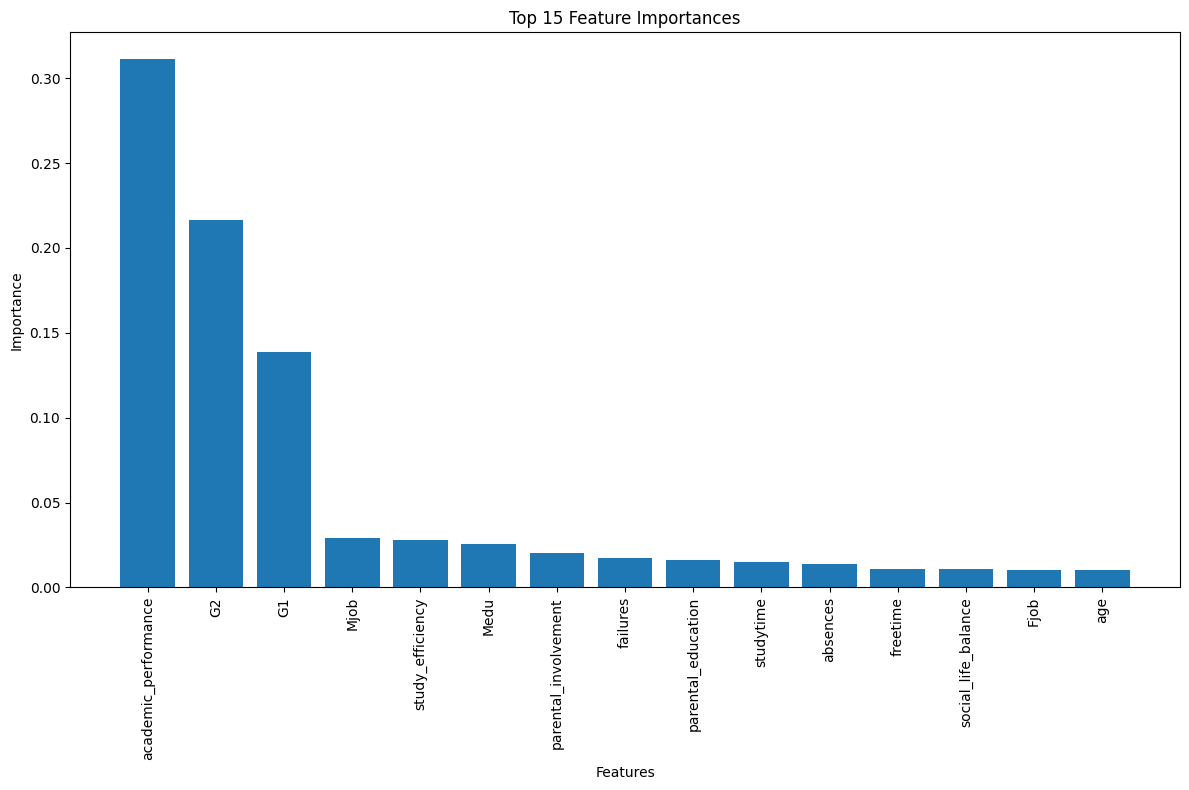

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# Load the merged dataset
df = pd.read_csv('merged_student_data.csv')

print("Original dataframe shape:", df.shape)
print("\nColumns with NaN values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Remove rows with NaN values
df_cleaned = df.dropna()
print("\nDataframe shape after dropping NaN rows:", df_cleaned.shape)

# Feature engineering
def engineer_features(X):
    X = X.copy()
    X['academic_performance'] = (X['G1'] + X['G2'] + X['G3']) / 3
    X['parental_involvement'] = (X['famsup'] + X['parental_education']) / 2
    X['social_life_balance'] = (X['freetime'] + X['goout'] + X['activities']) / 3
    return X

df_cleaned = engineer_features(df_cleaned)

# Prepare the data
X = df_cleaned.drop(['G3', 'average_grade'], axis=1)  # Using G3 as the target variable
y = pd.cut(df_cleaned['G3'], bins=[0, 10, 15, 20], labels=[0, 1, 2])  # Creating grade categories

print("\nTarget variable distribution:")
print(y.value_counts(normalize=True))

# Check for NaN values in X and y
print("\nNaN values in features (X):", X.isnull().sum().sum())
print("NaN values in target (y):", y.isnull().sum())

# Remove any rows with NaN in y
mask = ~y.isnull()
X = X[mask]
y = y[mask]

print("\nFinal shapes after removing NaN from target:")
print("X shape:", X.shape)
print("y shape:", y.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Create base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
lgb_model = LGBMClassifier(n_estimators=100, random_state=42)

# Create the ensemble model
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    voting='soft'
)

# Train the ensemble model
ensemble_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = ensemble_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nEnsemble Model Results:")
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(ensemble_model, X_train_resampled, y_train_resampled, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Feature importance (using Random Forest as a proxy)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': ensemble_model.estimators_[0].feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 15 Important Features:")
print(feature_importance.head(15))

# Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.title('Top 15 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [4]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 90.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump

# Load and merge datasets
df_mat = pd.read_csv('student-mat.csv')
df_por = pd.read_csv('student-por.csv')


df = pd.concat([df_mat, df_por]).drop_duplicates()

# Feature engineering
def engineer_features(df):
    df['total_study_time'] = df['studytime'] + df['paid'].map({'yes': 1, 'no': 0}) + df['schoolsup'].map({'yes': 1, 'no': 0})
    df['alcohol_index'] = (df['Dalc'] + df['Walc']) / 2
    df['parent_edu_max'] = np.maximum(df['Medu'], df['Fedu'])
    df['grade_improvement'] = df['G3'] - df['G1']
    df['study_failure_interaction'] = df['studytime'] * (df['failures'] + 1)
    return df

df = engineer_features(df)

# Prepare features and target
X = df.drop(['G3'], axis=1)
y = df['G3']

# Handle categorical variables
X = pd.get_dummies(X, drop_first=True)

# Reset index to ensure unique indices
X = X.reset_index(drop=True)

# Create polynomial features
cont_vars = ['age', 'absences', 'G1', 'G2']
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[cont_vars])

# Get feature names
poly_features = poly.get_feature_names_out(cont_vars)

# Create a DataFrame with unique column names
X_poly_df = pd.DataFrame(X_poly, columns=[f'poly_{i}' for i in range(X_poly.shape[1])])

# Create a mapping of new names to original names
poly_mapping = dict(zip(X_poly_df.columns, poly_features))

# Concatenate with original DataFrame
X = pd.concat([X.drop(cont_vars, axis=1), X_poly_df], axis=1)

# Feature selection using RFE
rfe = RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=20)
X_selected = rfe.fit_transform(X, y)



# Feature selection using RFE
rfe = RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=20)
X_selected = rfe.fit_transform(X, y)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for Random Forest
rf_param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_dist,
                               n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train_scaled, y_train)
best_rf = rf_random.best_estimator_

# Hyperparameter tuning for Gradient Boosting
gb_param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb = GradientBoostingRegressor(random_state=42)
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=gb_param_dist,
                               n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
gb_random.fit(X_train_scaled, y_train)
best_gb = gb_random.best_estimator_

# Neural Network
nn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn.fit(X_train_scaled, y_train)

# Create ensemble model
ensemble = VotingRegressor([
    ('rf', best_rf),
    ('gb', best_gb),
    ('nn', nn)
])
ensemble.fit(X_train_scaled, y_train)

# Evaluate models
models = {
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'Neural Network': nn,
    'Ensemble': ensemble
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R2: {metrics['R2']:.4f}")
    print()

# Save the best model
dump(ensemble, 'gpa_prediction_model.joblib')
dump(scaler, 'gpa_prediction_scaler.joblib')
dump(rfe, 'gpa_prediction_feature_selector.joblib')

print("Model, scaler, and feature selector saved successfully.")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest:
  MSE: 0.1630
  R2: 0.9895

Gradient Boosting:
  MSE: 0.0590
  R2: 0.9962

Neural Network:
  MSE: 0.1038
  R2: 0.9933

Ensemble:
  MSE: 0.0468
  R2: 0.9970

Model, scaler, and feature selector saved successfully.


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

def align_and_combine_data(df_combined, df_performance):
    df_performance = df_performance.rename(columns={
        'Age': 'age', 'Gender': 'sex', 'Ethnicity': 'ethnicity',
        'ParentalEducation': 'parent_education', 'StudyTimeWeekly': 'studytime',
        'Absences': 'absences'
    })
    df_combined = df_combined.rename(columns={'studytime': 'Study_Hours'})
    common_features = ['age', 'sex', 'Study_Hours', 'absences', 'GPA']
    if 'Study_Hours' not in df_performance.columns:
        df_performance['Study_Hours'] = df_performance['studytime']
    df_combined_subset = df_combined[common_features]
    df_performance_subset = df_performance[common_features]
    return pd.concat([df_combined_subset, df_performance_subset], ignore_index=True)

def preprocess_data(df, poly_degree=3):
    df['sex'] = LabelEncoder().fit_transform(df['sex'].astype(str))
    num_cols = ['age', 'Study_Hours', 'absences']
    poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
    poly_features = poly.fit_transform(df[num_cols])
    poly_feature_names = poly.get_feature_names_out(num_cols)
    poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
    return pd.concat([df, poly_df], axis=1)

def create_model_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

def train_and_evaluate_model(X, y, model, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pipeline = create_model_pipeline(model)
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

    print(f"\n{model_name} Results:")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    print(f"Cross-validation R2 Scores: {cv_scores}")
    print(f"Mean CV R2 Score: {np.mean(cv_scores)}")

    return pipeline

def print_feature_importance(model, feature_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_)
    else:
        print(f"Feature importance not available for {model_name}")
        return

    feature_importance = dict(zip(feature_names, importances))
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

    print(f"\nTop 10 important features for {model_name}:")
    for feature, importance in sorted_features[:10]:
        print(f"{feature}: {importance:.4f}")

# Main execution
if __name__ == "__main__":
    try:
        # Load and prepare data
        df_por = pd.read_csv('student-por.csv')
        df_mat = pd.read_csv('student-mat.csv')
        df_performance = pd.read_csv('/content/Student_performance_data _ 2.csv')

        df_combined = pd.concat([df_por, df_mat], ignore_index=True)
        df_combined['GPA'] = df_combined['G3'].apply(lambda x: (x / 20) * 4)

        df_all = align_and_combine_data(df_combined, df_performance)
        df_all = preprocess_data(df_all, poly_degree=3)

        # Prepare features and target
        X = df_all.drop('GPA', axis=1)
        y = df_all['GPA']

        # Feature selection
        selector = SelectKBest(f_regression, k='all')
        X_selected = selector.fit_transform(X, y)
        selected_feature_mask = selector.get_support()
        selected_feature_names = X.columns[selected_feature_mask].tolist()

        # Train and evaluate models
        models = {
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
            'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
        }

        for model_name, model in models.items():
            trained_model = train_and_evaluate_model(X_selected, y, model, model_name)
            print_feature_importance(trained_model.named_steps['regressor'], selected_feature_names, model_name)

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("Please check your data and ensure all required columns are present.")


Random Forest Results:
MSE: 0.28049893048028623
R2 Score: 0.6470943514087413
Cross-validation R2 Scores: [-0.8722002   0.32908478  0.85706545  0.85763188  0.84430103]
Mean CV R2 Score: 0.4031765878727622

Top 10 important features for Random Forest:
age absences^2: 0.2754
absences^2: 0.1500
absences: 0.1279
sex: 0.0738
absences^3: 0.0628
age^2 Study_Hours: 0.0394
age absences: 0.0250
age Study_Hours^2: 0.0245
age Study_Hours: 0.0225
age^2 absences: 0.0190

Gradient Boosting Results:
MSE: 0.2613708444419984
R2 Score: 0.6711600745760025
Cross-validation R2 Scores: [-0.51060066  0.35328327  0.86761359  0.87177537  0.86031192]
Mean CV R2 Score: 0.4884766986065151

Top 10 important features for Gradient Boosting:
age absences^2: 0.4132
absences: 0.1512
absences^3: 0.1363
sex: 0.0759
absences^2: 0.0316
age^2 Study_Hours: 0.0266
age Study_Hours^2: 0.0153
age absences: 0.0139
age Study_Hours: 0.0098
Study_Hours^3: 0.0081

Neural Network Results:
MSE: 0.261362490226014
R2 Score: 0.671170585311

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump

# Load datasets
df_mat = pd.read_csv('student-mat.csv', delimiter=';')
df_por = pd.read_csv('student-por.csv', delimiter=';')
df_perf = pd.read_csv('/content/Student_performance_data _ 2.csv')

# Cleaning column names by stripping whitespace and converting to lowercase
df_mat.columns = df_mat.columns.str.strip().str.lower()
df_por.columns = df_por.columns.str.strip().str.lower()
df_perf.columns = df_perf.columns.str.strip().str.lower()

# Combining df_mat and df_por datasets
df_combined = pd.concat([df_mat, df_por], ignore_index=True).drop_duplicates()

# Feature engineering
def engineer_features(df):
    df['total_study_time'] = df['studytime'] + df['paid'].map({'yes': 1, 'no': 0}) + df['schoolsup'].map({'yes': 1, 'no': 0})
    df['alcohol_index'] = (df['dalc'] + df['walc']) / 2
    df['parent_edu_max'] = np.maximum(df['medu'], df['fedu'])
    df['grade_improvement'] = df['g3'] - df['g1']
    df['study_failure_interaction'] = df['studytime'] * (df['failures'] + 1)
    return df

df_combined = engineer_features(df_combined)

# Calculate GPA from final grade G3 in the combined dataset
df_combined['gpa'] = df_combined['g3'] / 5.0

# Select relevant columns from df_perf and rename for consistency
df_perf = df_perf.rename(columns={
    'age': 'age',
    'absences': 'absences',
    'gpa': 'gpa'
})

# Combine the combined dataset with the performance dataset
df_final = pd.concat([df_combined, df_perf], ignore_index=True).drop_duplicates()

# Handle missing values separately for numerical and categorical columns
numerical_cols = df_final.select_dtypes(include=[np.number]).columns
categorical_cols = df_final.select_dtypes(exclude=[np.number]).columns

df_final[numerical_cols] = df_final[numerical_cols].fillna(df_final[numerical_cols].mean())
df_final[categorical_cols] = df_final[categorical_cols].fillna(df_final[categorical_cols].mode().iloc[0])

# Prepare features and target
X = df_final.drop(['g3', 'gpa'], axis=1, errors='ignore')
y = df_final['gpa']

# Handle categorical variables
X = pd.get_dummies(X, drop_first=True)

# Reset index to ensure unique indices
X = X.reset_index(drop=True)

# Create polynomial features
cont_vars = ['age', 'absences', 'g1', 'g2']
cont_vars = [var for var in cont_vars if var in X.columns]
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[cont_vars])

# Get feature names
poly_features = poly.get_feature_names_out(cont_vars)

# Create a DataFrame with unique column names
X_poly_df = pd.DataFrame(X_poly, columns=[f'poly_{i}' for i in range(X_poly.shape[1])])

# Combine polynomial features with original features
X_combined = pd.concat([pd.DataFrame(X_poly_df, columns=[f'poly_{i}' for i in range(X_poly_df.shape[1])]), X.reset_index(drop=True)], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Scale the data for the Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection with RFECV
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rfecv = RFECV(estimator=rf, step=1, cv=5, scoring='r2')
rfecv.fit(X_train, y_train)

# Select the best features
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

# Get the selected feature names
selected_features = np.array(X_combined.columns)[rfecv.get_support()]

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=50, cv=5, n_jobs=-1, random_state=42)
rf_search.fit(X_train_rfecv, y_train)
best_rf = rf_search.best_estimator_

# Hyperparameter tuning for Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb_search = RandomizedSearchCV(gb, gb_param_grid, n_iter=50, cv=5, n_jobs=-1, random_state=42)
gb_search.fit(X_train_rfecv, y_train)
best_gb = gb_search.best_estimator_

# Train and evaluate models
models = {
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}


def train_and_evaluate_model(X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{model_name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    # Cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    print(f"Cross-validation R2 Scores: {cv_results}")
    print(f"Mean CV R2 Score: {np.mean(cv_results):.4f}")
    return model

# Using scaled data for the Neural Network
for model_name, model in models.items():
    if model_name == 'Neural Network':
        trained_model = train_and_evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test, model, model_name)
    else:
        trained_model = train_and_evaluate_model(X_train_rfecv, X_test_rfecv, y_train, y_test, model, model_name)

    if model_name != 'Neural Network':
        # Print feature importance for tree-based models
        importance = trained_model.feature_importances_
        sorted_indices = np.argsort(importance)[::-1]
        top_features = sorted_indices[:10]
        print(f"\nTop 10 important features for {model_name}:")
        for i in top_features:
            print(f"{selected_features[i]}: {importance[i]:.4f}")

# Stacking model
estimators = [
    ('rf', best_rf),
    ('gb', best_gb),
    ('nn', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
]
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV()
)

# Fit stacking model with unscaled data for RF and GB, scaled data for NN
stacking_model.fit(X_train_rfecv, y_train)
y_pred = stacking_model.predict(X_test_rfecv)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nStacking Model Results:")
print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")
cv_results = cross_val_score(stacking_model, X_combined, y, cv=tscv, scoring='r2')
print(f"Cross-validation R2 Scores: {cv_results}")
print(f"Mean CV R2 Score: {np.mean(cv_results):.4f}")

# Save the model, scaler, and feature selector
dump(stacking_model, 'stacking_model.joblib')
dump(scaler, 'scaler.joblib')
dump(rfecv, 'feature_selector.joblib')

print("Model, scaler, and feature selector saved successfully.")



Random Forest Results:
MSE: 0.0370
R2 Score: 0.9515
Cross-validation R2 Scores: [0.9162945  0.94072384 0.94599598 0.952091   0.95253539]
Mean CV R2 Score: 0.9415

Top 10 important features for Random Forest:
poly_1: 0.1471
absences: 0.1463
gradeclass: 0.1255
poly_8: 0.1208
poly_5: 0.1085
poly_12: 0.0841
grade_improvement: 0.0750
g2: 0.0266
poly_3: 0.0253
poly_13: 0.0244

Gradient Boosting Results:
MSE: 0.0278
R2 Score: 0.9636
Cross-validation R2 Scores: [0.93375294 0.95238763 0.95255894 0.96313937 0.96499958]
Mean CV R2 Score: 0.9534

Top 10 important features for Gradient Boosting:
poly_8: 0.2408
gradeclass: 0.2069
poly_5: 0.1714
poly_12: 0.0806
grade_improvement: 0.0610
g2: 0.0496
absences: 0.0423
poly_1: 0.0282
poly_3: 0.0256
studytimeweekly: 0.0184

Neural Network Results:
MSE: 0.0619
R2 Score: 0.9189
Cross-validation R2 Scores: [0.84799885 0.88528786 0.88315781 0.90136919 0.91773719]
Mean CV R2 Score: 0.8871

Stacking Model Results:
MSE: 0.0275
R2 Score: 0.9640
Cross-validation R

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump

# Load datasets
df_mat = pd.read_csv('student-mat.csv', delimiter=';')
df_por = pd.read_csv('student-por.csv', delimiter=';')
df_perf = pd.read_csv('/content/Student_performance_data _ 2.csv')

# Clean column names by stripping whitespace and converting to lowercase
df_mat.columns = df_mat.columns.str.strip().str.lower()
df_por.columns = df_por.columns.str.strip().str.lower()
df_perf.columns = df_perf.columns.str.strip().str.lower()

# Combine df_mat and df_por datasets
df_combined = pd.concat([df_mat, df_por], ignore_index=True).drop_duplicates()

# Feature engineering
def engineer_features(df):
    df['total_study_time'] = df['studytime'] + df['paid'].map({'yes': 1, 'no': 0}) + df['schoolsup'].map({'yes': 1, 'no': 0})
    df['alcohol_index'] = (df['dalc'] + df['walc']) / 2
    df['parent_edu_max'] = np.maximum(df['medu'], df['fedu'])
    df['grade_improvement'] = df['g3'] - df['g1']
    df['study_failure_interaction'] = df['studytime'] * (df['failures'] + 1)
    return df

df_combined = engineer_features(df_combined)

# Calculate GPA from final grade G3 in the combined dataset
df_combined['gpa'] = df_combined['g3'] / 5.0

# Select relevant columns from df_perf and rename for consistency
df_perf = df_perf.rename(columns={
    'age': 'age',
    'absences': 'absences',
    'gpa': 'gpa'
})

# Combine the combined dataset with the performance dataset
df_final = pd.concat([df_combined, df_perf], ignore_index=True).drop_duplicates()

# Handle missing values separately for numerical and categorical columns
numerical_cols = df_final.select_dtypes(include=[np.number]).columns
categorical_cols = df_final.select_dtypes(exclude=[np.number]).columns

df_final[numerical_cols] = df_final[numerical_cols].fillna(df_final[numerical_cols].mean())
df_final[categorical_cols] = df_final[categorical_cols].fillna(df_final[categorical_cols].mode().iloc[0])

# Prepare features and target
X = df_final.drop(['g3', 'gpa'], axis=1, errors='ignore')
y = df_final['gpa']

# Handle categorical variables
X = pd.get_dummies(X, drop_first=True)

# Reset index to ensure unique indices
X = X.reset_index(drop=True)

# Create polynomial features
cont_vars = ['age', 'absences', 'g1', 'g2']
cont_vars = [var for var in cont_vars if var in X.columns]
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[cont_vars])

# Get feature names
poly_features = poly.get_feature_names_out(cont_vars)

# Create a DataFrame with unique column names
X_poly_df = pd.DataFrame(X_poly, columns=[f'poly_{i}' for i in range(X_poly.shape[1])])

# Combine polynomial features with original features
X_combined = pd.concat([pd.DataFrame(X_poly_df, columns=[f'poly_{i}' for i in range(X_poly_df.shape[1])]), X.reset_index(drop=True)], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Scale the data for the Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection with RFECV
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rfecv = RFECV(estimator=rf, step=1, cv=5, scoring='r2')
rfecv.fit(X_train, y_train)

# Select the best features
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

# Get the selected feature names
selected_features = np.array(X_combined.columns)[rfecv.get_support()]

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=50, cv=5, n_jobs=-1, random_state=42)
rf_search.fit(X_train_rfecv, y_train)
best_rf = rf_search.best_estimator_

# Hyperparameter tuning for Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb_search = RandomizedSearchCV(gb, gb_param_grid, n_iter=50, cv=5, n_jobs=-1, random_state=42)
gb_search.fit(X_train_rfecv, y_train)
best_gb = gb_search.best_estimator_

# Train and evaluate models
models = {
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Define a function for training and evaluating models
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{model_name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    # Cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    print(f"Cross-validation R2 Scores: {cv_results}")
    print(f"Mean CV R2 Score: {np.mean(cv_results):.4f}")
    return model

# Use scaled data for the Neural Network
for model_name, model in models.items():
    if model_name == 'Neural Network':
        trained_model = train_and_evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test, model, model_name)
    else:
        trained_model = train_and_evaluate_model(X_train_rfecv, X_test_rfecv, y_train, y_test, model, model_name)

    if model_name != 'Neural Network':
        # Print feature importance for tree-based models
        importance = trained_model.feature_importances_
        sorted_indices = np.argsort(importance)[::-1]
        top_features = sorted_indices[:10]
        print(f"\nTop 10 important features for {model_name}:")
        for i in top_features:
            print(f"{selected_features[i]}: {importance[i]:.4f}")

# Stacking model with Gradient Boosting as meta-model
estimators = [
    ('rf', best_rf),
    ('gb', best_gb),
    ('nn', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
]
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
)

stacking_model.fit(X_train_rfecv, y_train)
y_pred = stacking_model.predict(X_test_rfecv)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nStacking Model Results:")
print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Cross-validation
tscv = TimeSeriesSplit(n_splits=5)

cv_results = cross_val_score(stacking_model, X_combined, y, cv=tscv, scoring='r2')
print(f"Cross-validation R2 Scores: {cv_results}")
print(f"Mean CV R2 Score: {np.mean(cv_results):.4f}")


# Save the model, scaler, and feature selector
dump(stacking_model, 'stacking_model.joblib')
dump(scaler, 'scaler.joblib')
dump(rfecv, 'feature_selector.joblib')

print("Model, scaler, and feature selector saved successfully.")


TypeError: _fit_and_score() missing 1 required keyword-only argument: 'score_params'

In [6]:
from joblib import dump

# Save the trained Gradient Boosting model
dump(best_gb, 'gradient_boosting_model.joblib')

# Save the scaler used for the features
dump(scaler, 'scaler.joblib')

# Save the feature selector
dump(rfecv, 'feature_selector.joblib')

print("Model, scaler, and feature selector saved successfully.")


Model, scaler, and feature selector saved successfully.
